In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [2]:
df = pd.read_csv("customer_churn_1M.csv")

In [3]:
df.head()

,customer_id,signup_date,age,gender,annual_income,education,marital_status,dependents,tenure,contract,...,has_streaming_tv,has_streaming_movies,customer_satisfaction,num_complaints,num_service_calls,late_payments,avg_monthly_gb,days_since_last_interaction,credit_score,churn
0,CUST0000000001,2022-12-12 12:53:58.199463,43,Female,55085.25,college,married,1,2,two_year,...,1,1,9.0,0.0,0,0,109.63,16,NaN,0
1,CUST0000000002,2022-01-13 12:53:58.199973,18,Male,60786.11,master,married,1,22,one_year,...,0,1,7.0,0.0,3,1,63.25,134,585.0,0
2,CUST0000000003,2023-09-04 12:53:58.199985,38,Female,73184.32,high_school,widowed,0,3,two_year,...,1,0,6.0,1.0,1,0,47.77,11,632.0,0
3,CUST0000000004,2022-06-27 12:53:58.199992,44,Male,40923.78,high_school,married,1,6,two_year,...,0,1,5.0,2.0,2,1,50.82,6,569.0,0
4,CUST0000000005,2022-12-08 12:53:58.199999,45,Female,36400.94,bachelor,single,0,9,two_year,...,0,1,8.0,1.0,1,0,16.74,18,657.0,0


In [4]:
df.shape

(1000000, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   customer_id                  1000000 non-null  object 
 1   signup_date                  1000000 non-null  object 
 2   age                          1000000 non-null  int64  
 3   gender                       1000000 non-null  object 
 4   annual_income                970041 non-null   float64
 5   education                    1000000 non-null  object 
 6   marital_status               1000000 non-null  object 
 7   dependents                   1000000 non-null  int64  
 8   tenure                       1000000 non-null  int64  
 9   contract                     1000000 non-null  object 
 10  payment_method               1000000 non-null  object 
 11  paperless_billing            1000000 non-null  object 
 12  senior_citizen               1000000 non-nu

In [6]:
df.describe()

,age,annual_income,dependents,tenure,senior_citizen,monthlycharges,totalcharges,num_services,has_phone_service,has_internet_service,...,has_streaming_tv,has_streaming_movies,customer_satisfaction,num_complaints,num_service_calls,late_payments,avg_monthly_gb,days_since_last_interaction,credit_score,churn
count,1000000.000000,970041.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.00000,1000000.000000,980079.000000,970094.000000,1000000.000000,1000000.000000,949988.000000,1000000.000000,959605.000000,1000000.000000
mean,44.724603,58788.311936,0.799831,22.381923,0.199511,86.443701,1837.321438,2.563721,0.769551,0.849742,...,0.59999,0.549086,6.159110,0.701667,1.760248,0.400969,39.095179,44.494191,678.562134,0.099227
std,14.479468,37137.433079,0.893654,20.073341,0.399633,27.592430,1803.721634,1.412330,0.421120,0.357324,...,0.48990,0.497585,2.328287,0.838148,1.485677,0.633289,43.852564,44.922587,87.642951,0.298967
min,18.000000,20000.000000,0.000000,1.000000,0.000000,20.000000,16.300000,1.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000
25%,34.000000,32712.560000,0.000000,6.000000,0.000000,70.490000,484.530000,1.000000,1.000000,1.000000,...,0.00000,0.000000,4.000000,0.000000,1.000000,0.000000,12.840000,12.000000,619.000000,0.000000
50%,44.000000,48954.600000,1.000000,16.000000,0.000000,85.480000,1249.750000,2.000000,1.000000,1.000000,...,1.00000,1.000000,7.000000,1.000000,1.000000,0.000000,27.770000,31.000000,680.000000,0.000000
75%,55.000000,73475.130000,1.000000,33.000000,0.000000,100.680000,2617.660000,3.000000,1.000000,1.000000,...,1.00000,1.000000,8.000000,1.000000,3.000000,1.000000,51.230000,62.000000,740.000000,0.000000
max,90.000000,250000.000000,5.000000,72.000000,1.000000,854.956730,16252.861508,6.000000,1.000000,1.000000,...,1.00000,1.000000,9.000000,7.000000,12.000000,5.000000,557.824023,365.000000,850.000000,1.000000


In [7]:
df.isnull().sum()

customer_id                        0
signup_date                        0
age                                0
gender                             0
annual_income                  29959
education                          0
marital_status                     0
dependents                         0
tenure                             0
contract                           0
payment_method                     0
paperless_billing                  0
senior_citizen                     0
monthlycharges                     0
totalcharges                       0
num_services                       0
has_phone_service                  0
has_internet_service               0
has_online_security                0
has_online_backup                  0
has_device_protection              0
has_tech_support                   0
has_streaming_tv                   0
has_streaming_movies               0
customer_satisfaction          19921
num_complaints                 29906
num_service_calls                  0
l

In [8]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

In [9]:
#impute missing values
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

customer_id                    0
signup_date                    0
age                            0
gender                         0
annual_income                  0
education                      0
marital_status                 0
dependents                     0
tenure                         0
contract                       0
payment_method                 0
paperless_billing              0
senior_citizen                 0
monthlycharges                 0
totalcharges                   0
num_services                   0
has_phone_service              0
has_internet_service           0
has_online_security            0
has_online_backup              0
has_device_protection          0
has_tech_support               0
has_streaming_tv               0
has_streaming_movies           0
customer_satisfaction          0
num_complaints                 0
num_service_calls              0
late_payments                  0
avg_monthly_gb                 0
days_since_last_interaction    0
credit_sco

In [11]:
correlations = df[num_cols].corr()
correlations

,age,annual_income,dependents,tenure,senior_citizen,monthlycharges,totalcharges,num_services,has_phone_service,has_internet_service,...,has_streaming_tv,has_streaming_movies,customer_satisfaction,num_complaints,num_service_calls,late_payments,avg_monthly_gb,days_since_last_interaction,credit_score,churn
age,1.000000,0.000795,-0.000254,0.001752,0.000435,-0.000574,0.001432,-0.000587,0.002293,0.000440,...,0.000987,0.000910,-0.001199,-0.000873,-0.001008,0.001538,-0.000135,0.000453,-0.000650,0.000264
annual_income,0.000795,1.000000,-0.000700,-0.000721,0.000865,0.001064,-0.000282,0.001604,0.002339,-0.000342,...,0.001071,-0.000763,0.001379,0.001460,0.000747,0.000003,-0.001026,0.000771,-0.000936,0.000459
dependents,-0.000254,-0.000700,1.000000,-0.001216,-0.000459,-0.002295,-0.001135,-0.000736,0.001117,0.000846,...,0.000780,0.001237,-0.002409,0.001660,-0.000727,0.002454,0.001212,0.001398,0.000140,-0.000145
tenure,0.001752,-0.000721,-0.001216,1.000000,-0.001340,-0.000631,0.912829,-0.001431,0.001282,-0.000082,...,-0.002728,-0.000473,-0.000627,-0.002413,-0.000716,-0.001073,-0.000845,0.000092,0.002486,-0.012709
senior_citizen,0.000435,0.000865,-0.000459,-0.001340,1.000000,-0.000347,-0.000820,-0.000488,-0.000023,-0.000384,...,0.001728,-0.001200,-0.000766,-0.000610,-0.000422,-0.000963,0.000190,0.001256,0.000456,0.000344
monthlycharges,-0.000574,0.001064,-0.002295,-0.000631,-0.000347,1.000000,0.224526,0.410663,0.066989,0.386898,...,-0.000863,0.001641,-0.000723,0.001776,0.000788,-0.000119,0.139491,-0.002576,-0.001397,-0.013849
totalcharges,0.001432,-0.000282,-0.001135,0.912829,-0.000820,0.224526,1.000000,0.132443,0.022820,0.126599,...,-0.002767,0.000198,-0.001406,-0.001976,-0.000401,-0.000897,0.044838,-0.000493,0.002388,-0.016501
num_services,-0.000587,0.001604,-0.000736,-0.001431,-0.000488,0.410663,0.132443,1.000000,-0.000568,0.000263,...,-0.001623,0.000626,0.000304,0.000903,0.001962,-0.000155,-0.000361,-0.001065,-0.000389,-0.033378
has_phone_service,0.002293,0.002339,0.001117,0.001282,-0.000023,0.066989,0.022820,-0.000568,1.000000,0.171257,...,0.003907,-0.000223,0.000228,-0.000070,-0.000629,0.000048,0.061484,0.000632,-0.000306,-0.002274
has_internet_service,0.000440,-0.000342,0.000846,-0.000082,-0.000384,0.386898,0.126599,0.000263,0.171257,1.000000,...,-0.001524,-0.000070,0.001190,0.001876,0.000434,-0.000567,0.362002,-0.001493,-0.000187,-0.015261


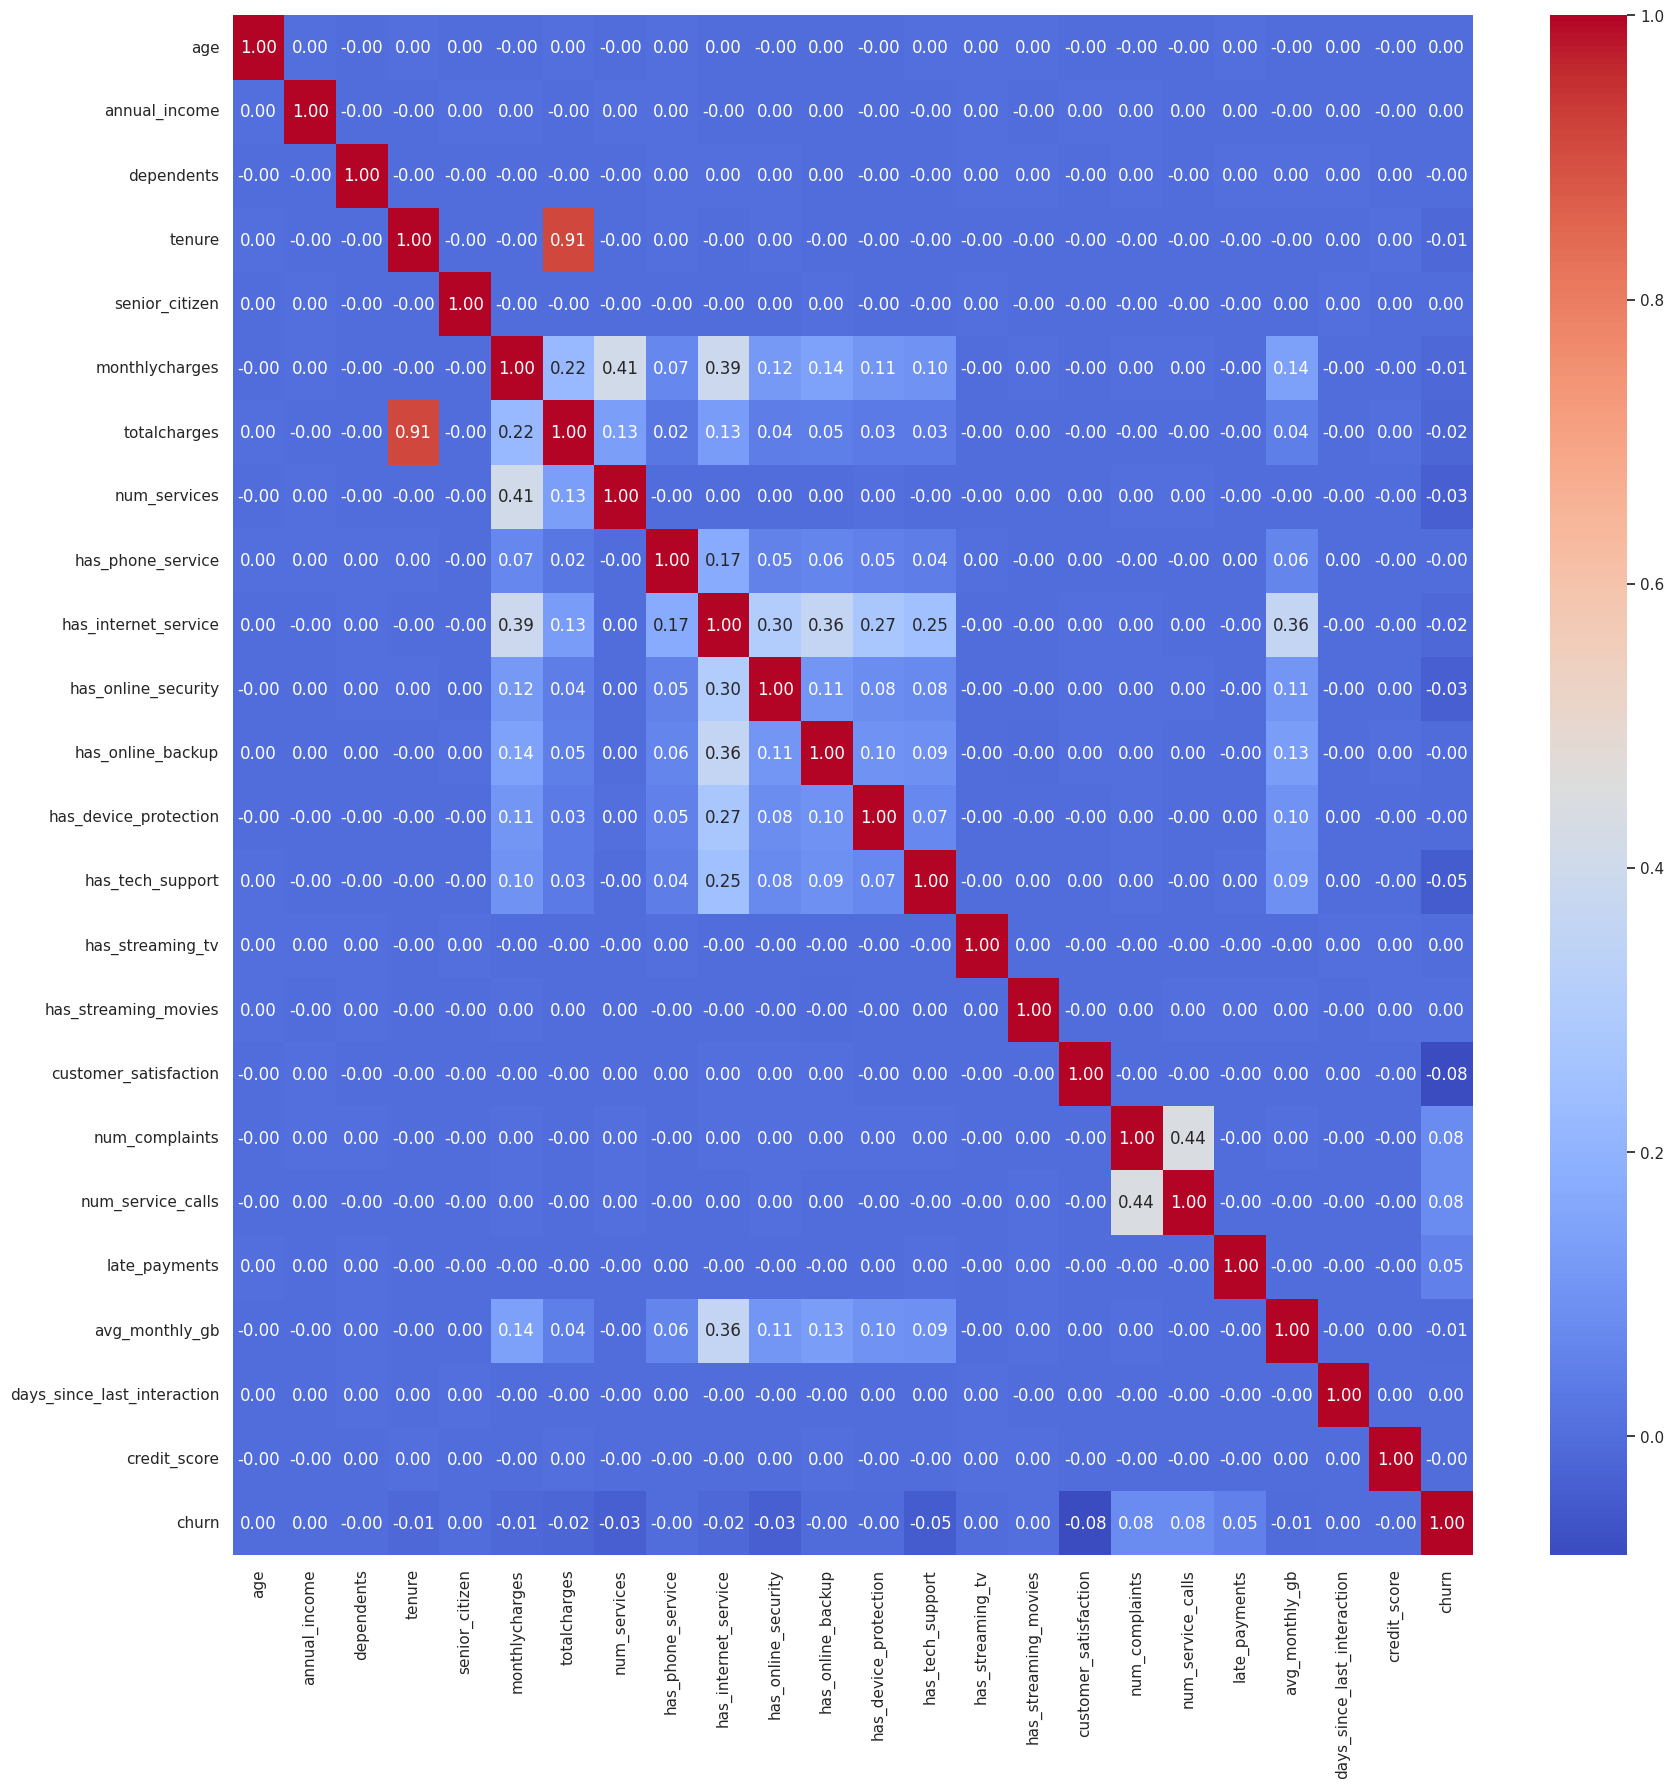

In [12]:
#limit the digits after the decimal point to 2
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [14]:
df["churn"].value_counts()

churn
0    900773
1     99227
Name: count, dtype: int64

In [15]:
df["churn"].value_counts(normalize=True) * 100

churn
0    90.0773
1     9.9227
Name: proportion, dtype: float64

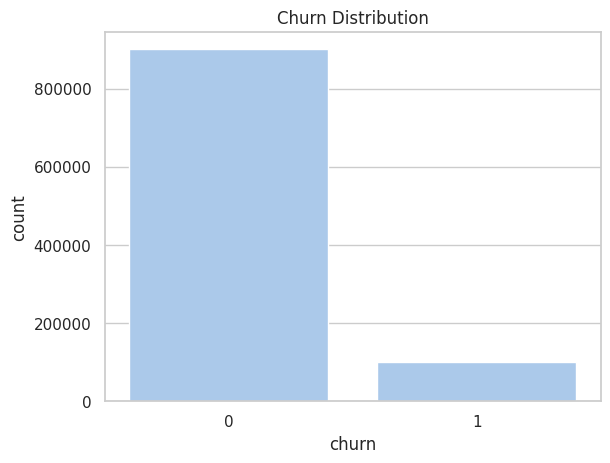

In [17]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

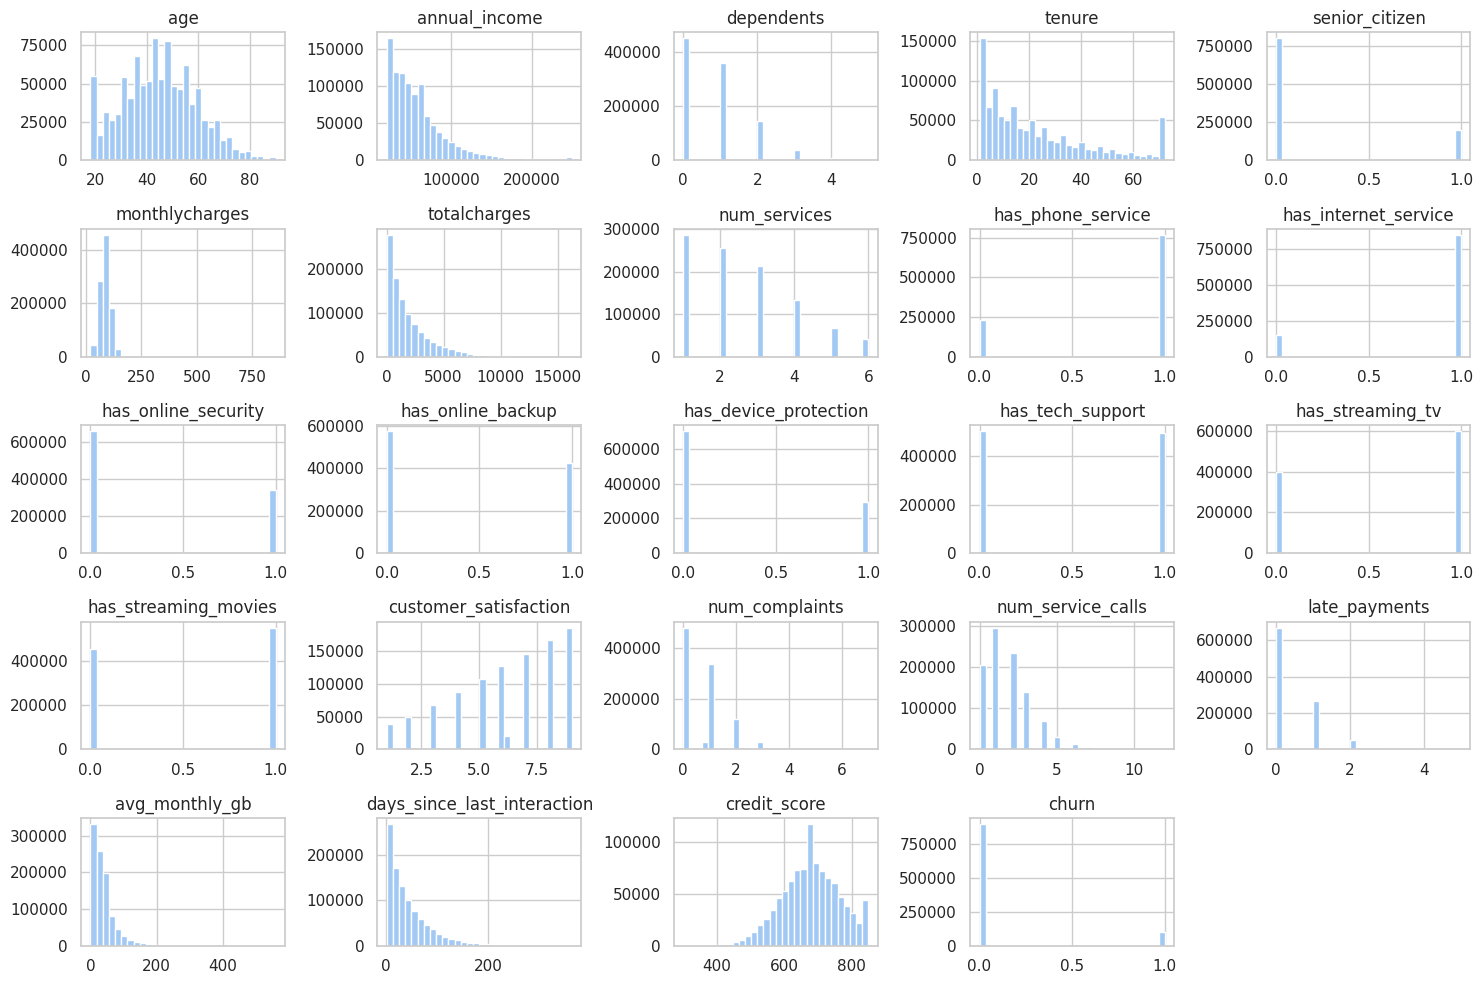

In [18]:
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()